# IDDAS Information

## setup
below functions are needed to setup the sparql template and querying support

The endpoint is hard-coded in the python code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from enable_sparql import execute_to_df, generate_sparql

All requests give us information about IDDAS:
- Property and type list
- Number of datasets, distributions, download URL and media type
- Information to catalogs list (numbers of datasets, download url and distribution)

This request shows us all the properties used in IDDAS and how many use.

In [2]:
all_props = execute_to_df('./sparql_requests/all_props.sparql')

print(all_props)

                                             property   count
0     http://www.w3.org/1999/02/22-rdf-syntax-ns#type  153066
1                http://purl.org/dc/terms/description   52756
2                             https://schema.org/name   50609
3                 https://schema.org/variableMeasured   50609
4                      http://www.w3.org/ns/prov#used   50080
5                      http://purl.org/dc/terms/title   48206
6              http://www.w3.org/ns/dcat#distribution   24818
7             http://www.w3.org/ns/dcat#accessService   24653
8                   http://www.w3.org/ns/dcat#dataset   23903
9             http://www.w3.org/ns/dcat#servesDataset   22689
10                   http://purl.org/dc/terms/creator   22600
11                 http://purl.org/dc/terms/publisher   21042
12                http://www.w3.org/ns/dcat#mediaType   21042
13                   http://purl.org/dc/terms/spatial   16637
14                     http://www.w3.org/ns/dcat#bbox   16637
15      

This request shows us all the types used in IDDAS and how many use.

In [21]:
all_types = execute_to_df('./sparql_requests/all_types.sparql')

all_types

,type,cnt
0,https://schema.org/PropertyValue,50609
1,http://www.w3.org/ns/dcat#Distribution,24818
2,http://www.w3.org/ns/dcat#Dataset,23896
3,https://schema.org/Dataset,23896
4,http://purl.org/dc/terms/Location,16637
5,http://purl.org/dc/terms/PeriodOfTime,12757
6,http://www.w3.org/2004/02/skos/core#Concept,176
7,http://www.w3.org/2000/01/rdf-schema#Resource,83
8,http://www.w3.org/ns/dcat#DataService,57
9,http://www.w3.org/1999/02/22-rdf-syntax-ns#Pro...,48


dcat:Catalog & hydra:PartialCollectionView

In [130]:
# predicates associated with dcat:Catalogs
execute_to_df('./sparql_requests/catalog_predicates.sparql')

,p
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1,http://www.w3.org/ns/dcat#dataset
2,http://www.w3.org/2000/01/rdf-schema#label
3,http://purl.org/dc/terms/description
4,http://purl.org/dc/terms/title
5,http://www.w3.org/ns/hydra/core#totalItems
6,http://www.w3.org/ns/hydra/core#itemsPerPage
7,http://www.w3.org/ns/hydra/core#firstPage
8,http://www.w3.org/ns/hydra/core#lastPage


In [131]:
execute_to_df('./sparql_requests/dcatCatalog.sparql')

# 11 dcat:Catalog
# 2 have additional type 'http://www.w3.org/ns/hydra/core#PartialCollectionView' 
# -> http://data.blue-cloud.wip/search/dcat/argo?page=1
# -> http://data.blue-cloud.wip/search/dcat/elixir?page=1'

,s,type
0,https://essi-lab.eu/dab/fair-ease/catalog/wekeo,http://www.w3.org/ns/dcat#Catalog
1,https://essi-lab.eu/dab/fair-ease/catalog/FROM...,http://www.w3.org/ns/dcat#Catalog
2,https://essi-lab.eu/dab/fair-ease/catalog/UUID...,http://www.w3.org/ns/dcat#Catalog
3,http://data.blue-cloud.wip/search/dcat/argo?pa...,http://www.w3.org/ns/dcat#Catalog
4,http://data.blue-cloud.wip/search/dcat/argo?pa...,http://www.w3.org/ns/hydra/core#PartialCollect...
5,http://data.blue-cloud.wip/search/dcat,http://www.w3.org/ns/dcat#Catalog
6,http://data.blue-cloud.wip/search/dcat/icos?pa...,http://www.w3.org/ns/dcat#Catalog
7,http://data.blue-cloud.wip/search/dcat/emodnet...,http://www.w3.org/ns/dcat#Catalog
8,http://data.blue-cloud.wip/search/dcat/eurobis...,http://www.w3.org/ns/dcat#Catalog
9,http://data.blue-cloud.wip/search/dcat/elixir?...,http://www.w3.org/ns/dcat#Catalog


In [65]:
execute_to_df('./sparql_requests/partialCollectionView.sparql')

#properties associated with PartialCollectionView 
# http://www.w3.org/ns/hydra/core#totalItems
# http://www.w3.org/ns/hydra/core#itemsPerPage
# http://www.w3.org/ns/hydra/core#firstPage
# http://www.w3.org/ns/hydra/core#lastPage

#--> not in DCAT AP ?

,p
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1,http://purl.org/dc/terms/description
2,http://purl.org/dc/terms/title
3,http://www.w3.org/ns/dcat#dataset
4,http://www.w3.org/ns/hydra/core#totalItems
5,http://www.w3.org/ns/hydra/core#itemsPerPage
6,http://www.w3.org/ns/hydra/core#firstPage
7,http://www.w3.org/ns/hydra/core#lastPage


In [137]:
# predicates associated with dcat:Dataset
execute_to_df('./sparql_requests/dataset_predicates.sparql')

,p
0,http://www.w3.org/ns/dcat#theme
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
2,http://www.w3.org/ns/dcat#distribution
3,http://purl.org/dc/terms/temporal
4,http://purl.org/dc/terms/description
5,http://purl.org/dc/terms/issued
6,http://purl.org/dc/terms/title
7,http://purl.org/dc/terms/identifier
8,http://purl.org/dc/terms/spatial
9,http://purl.org/dc/terms/creator


In [139]:
# values of triples: dcat:Dataset --prov:used--> object
execute_to_df('./sparql_requests/dataset_provused.sparql')

#values are literal (string), not a prov:Activity

,o
0,18
1,NKE
2,ARGO
3,77
4,ARVOR I NAOS
...,...
995,Monthly
996,Whale-tourism
997,Animal migrations
998,Dana


In [140]:
# predicates associated with dcat:Distribution
execute_to_df('./sparql_requests/distribution_predicates.sparql')

,p
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1,http://purl.org/dc/terms/title
2,http://www.w3.org/ns/dcat#accessService
3,http://www.w3.org/ns/dcat#accessURL
4,http://www.w3.org/ns/dcat#downloadURL
5,http://purl.org/dc/terms/description
6,http://www.w3.org/ns/dcat#mediaType


In [141]:
# predicates associated with dcat:DataService
execute_to_df('./sparql_requests/dataservice_predicates.sparql')

,p
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1,http://www.w3.org/ns/dcat#endpointURL
2,http://www.w3.org/ns/dcat#servesDataset
3,http://purl.org/dc/terms/conformsTo
4,http://www.w3.org/ns/dcat#endpointDescription
5,http://purl.org/dc/terms/type
6,http://purl.org/dc/terms/description


This request shows us number of type per type per property

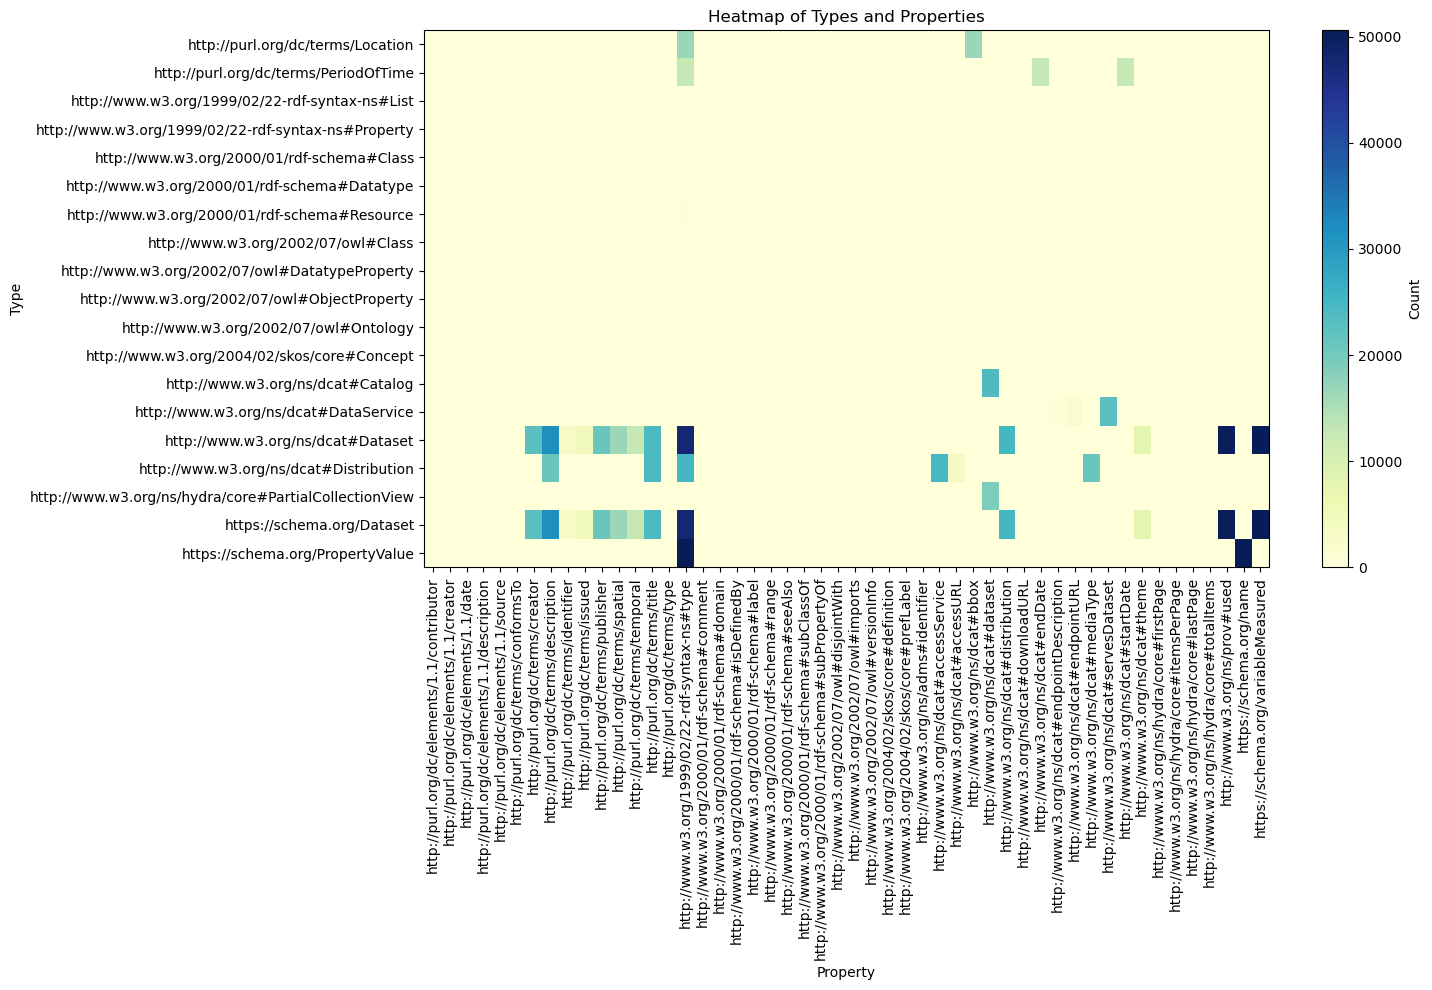

In [102]:
df = execute_to_df('./sparql_requests/all_types_props.sparql')

# Ensure that 'count' column is numeric
df['count'] = pd.to_numeric(df['count'])

# Create a pivot table to mix the counts for type and predicate
pivot_df = df.pivot_table(values='count', index='type', columns='property', aggfunc='sum', fill_value=0)

# Plotting the heatmap using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(pivot_df.values, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Count')
plt.xticks(ticks=range(len(pivot_df.columns)), labels=pivot_df.columns, rotation=90)
plt.yticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)
plt.xlabel('Property')
plt.ylabel('Type')
plt.title('Heatmap of Types and Properties')
plt.tight_layout()

# Show the plot
plt.show()

In [92]:
df

,property,type,count
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://schema.org/PropertyValue,50609
1,https://schema.org/name,https://schema.org/PropertyValue,50609
2,https://schema.org/variableMeasured,http://www.w3.org/ns/dcat#Dataset,50609
3,https://schema.org/variableMeasured,https://schema.org/Dataset,50609
4,http://www.w3.org/ns/prov#used,http://www.w3.org/ns/dcat#Dataset,50080
...,...,...,...
168,http://purl.org/dc/elements/1.1/date,http://www.w3.org/2002/07/owl#Ontology,1
169,http://purl.org/dc/elements/1.1/description,http://www.w3.org/2002/07/owl#Ontology,1
170,http://purl.org/dc/terms/description,http://www.w3.org/ns/dcat#DataService,1
171,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Ontology,1


Catalog list :
- Number of datasets
- Number of datasets with distribution
- Number of datasets with download URL
- Number of datasets with access URL
- Number of datasets with identifier
- Number of datasets with media type

In [3]:
df = execute_to_df('./sparql_requests/catalog_info.sparql')
df

,catalog_name,cnt_datasets,cnt_datasets_dist,cnt_datasets_dlurl,cnt_datasets_accessurl,cnt_datasets_id,cnt_datasets_mediatype
0,All catalog,23896,21889,87,847,2771,21042
1,WEkEO,2005,0,0,0,0,0
2,VITO /Copernicus Global Land Services,127,127,0,127,127,0
3,European Environment Agency SDI Catalog,722,720,87,720,718,0
4,Blue-Cloud DD&AS argo DCAT Catalog - Page 1,9847,9847,0,0,0,9847
5,Blue-Cloud DD&AS SeaDataNet Products DCAT Catalog,49,49,0,0,49,49
6,Blue-Cloud DD&AS Integrated Carbon Observation...,301,301,0,0,301,301
7,Blue-Cloud DD&AS EuroBIS DCAT Catalog,1232,1232,0,0,1232,1232
8,Blue-Cloud DD&AS EMODnet Physics DCAT Catalog,20,20,0,0,20,20
9,Blue-Cloud DD&AS EMODnet Chemistry DCAT Catalog,324,324,0,0,324,324


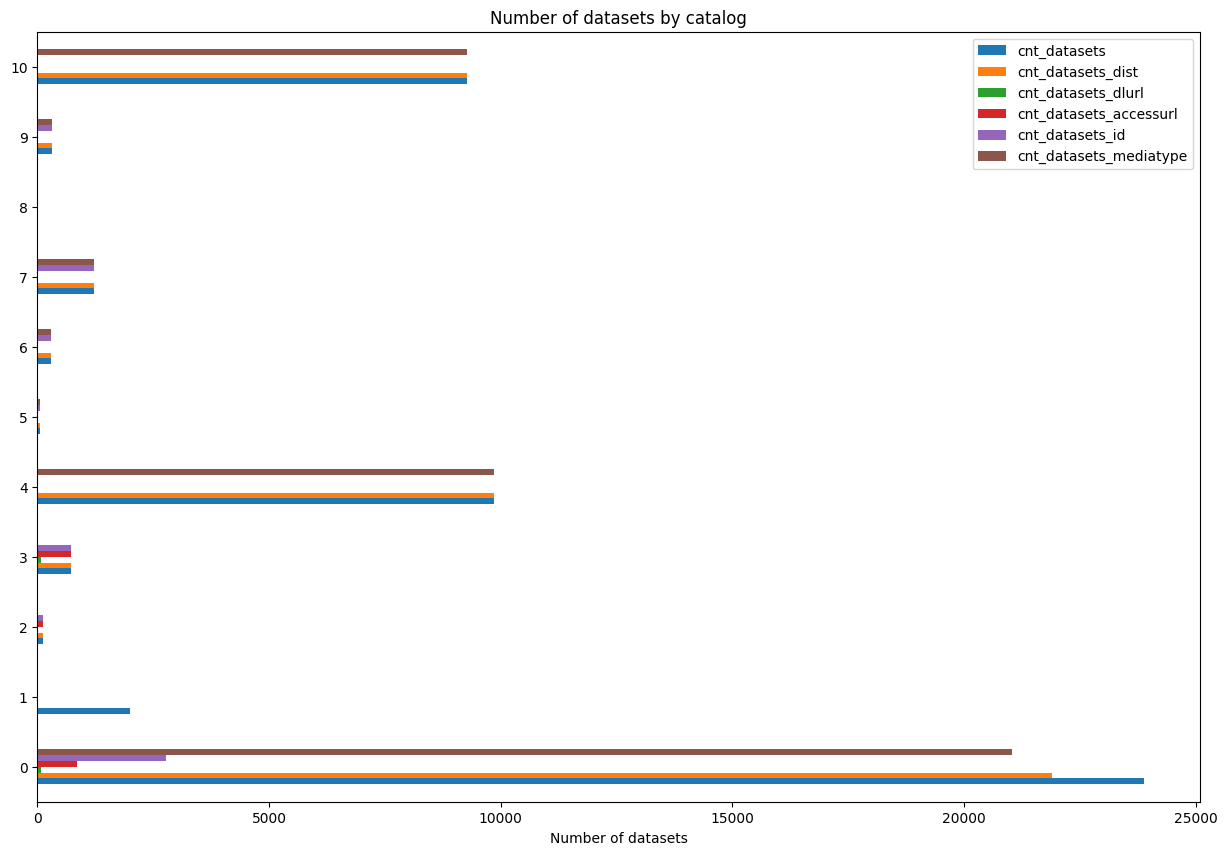

In [8]:
numeric_columns = [
    'cnt_datasets', 'cnt_datasets_dist', 'cnt_datasets_dlurl', 
    'cnt_datasets_accessurl', 'cnt_datasets_id', 'cnt_datasets_mediatype'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plot_data = df[numeric_columns]
plot_data.plot(kind='barh', figsize=(15, 10))
plt.title('Number of datasets by catalog')
plt.xlabel('Number of datasets')
plt.show()
